In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('ratings_train.csv')

In [5]:
data.dropna(inplace=True)

In [6]:
train_df=data[:150]

In [7]:
# 텍스트 벡터화
tfidf=TfidfVectorizer()

In [8]:
tfidf_matrix= tfidf.fit_transform(train_df['document'])

In [10]:
tfidf_matrix.shape

(150, 944)

In [11]:
# 문장간의 유사도 분석
cosine_sim=cosine_similarity(tfidf_matrix, tfidf_matrix)

In [13]:
cosine_sim.shape

(150, 150)

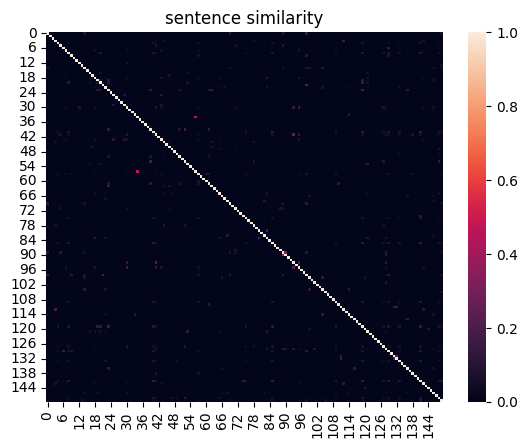

In [14]:
df=pd.DataFrame(cosine_sim)
ax= sns.heatmap(df)
plt.title("sentence similarity")
plt.show()

In [16]:
title_to_index=dict(zip(train_df['document'], train_df.index))

In [17]:
title_to_index

{'아 더빙.. 진짜 짜증나네요 목소리': 0,
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나': 1,
 '너무재밓었다그래서보는것을추천한다': 2,
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정': 3,
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다': 4,
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.': 5,
 '원작의 긴장감을 제대로 살려내지못했다.': 6,
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네': 7,
 '액션이 없는데도 재미 있는 몇안되는 영화': 8,
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?': 9,
 '걍인피니트가짱이다.진짜짱이다♥': 10,
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~': 11,
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해': 12,
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.': 13,
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지': 14,
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ': 15,
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다': 16,
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐': 17,
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥': 18,
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.': 19,
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님': 20,
 '보면서 웃

In [21]:
def get_recommendations(doc, cosine_sim, view_num):
    """
    info: 특정 문장/리뷰에 대해 유사한 문장 선택
    param cosin_sim: 유사도 분석결과 (m*m)
    param view_num : 유사한 문장의 수를 설정
    """
    idx = title_to_index[doc] # 선택한 영화 리뷰의 인덱스
    sim_score = list(enumerate(cosine_sim[idx])) #해당 영화 리뷰와 유사한 리뷰 선택
    #유사한 리뷰순으로 정렬
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True) #* n의 행렬이므로 선택한 문장도 포함된 데이터
    sim_score=sim_score[1:1+view_num]#n* n의 행렬이므로 선택한 문장도 포함된 데이터
    # 선택한 유사 리뷰 인덱싱
    review_idices= [idx[0] for idx in sim_score]
    #선택한 유사 리뷰의 내용 보기
    review_doc= train_df['document'].iloc[review_idices]
    
    return review_doc

In [22]:
get_recommendations('재밋는뎅',cosine_sim,5)

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [23]:
get_recommendations('아직도 이 드라마는 내인생의 최고!',cosine_sim,5)

56                                   최고
0                   아 더빙.. 진짜 짜증나네요 목소리
1     흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                     너무재밓었다그래서보는것을추천한다
3         교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
Name: document, dtype: object

In [24]:
#다른 유사도 알고리즘 적용
from sklearn.metrics.pairwise import euclidean_distances
euc_sim=euclidean_distances(tfidf_matrix,tfidf_matrix)

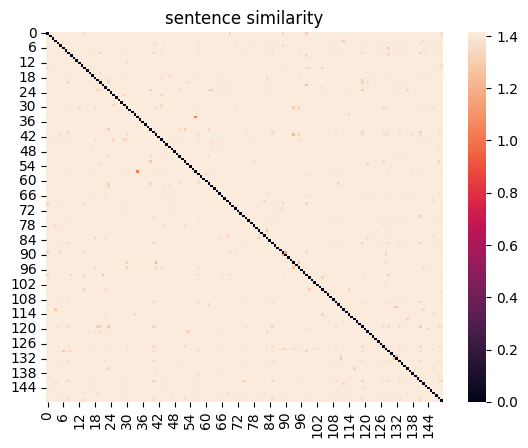

In [25]:
df=pd.DataFrame(euc_sim)
ax= sns.heatmap(df)
plt.title("sentence similarity")
plt.show()

In [27]:
get_recommendations('재밋는뎅',euc_sim,5)

22     재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의...
65     많은 사람들이 이 다큐를 보고 우리나라 슬픈 현대사의 한 단면에 대해 깊이 생각하고...
149    아~ 진짜 조금만 더 손 좀 보면 왠만한 상업 영화 못지 않게 퀄리티 쩔게 만들어 ...
1                      흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                      너무재밓었다그래서보는것을추천한다
Name: document, dtype: object

In [28]:
get_recommendations('아직도 이 드라마는 내인생의 최고!',euc_sim,5)

22     재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의...
65     많은 사람들이 이 다큐를 보고 우리나라 슬픈 현대사의 한 단면에 대해 깊이 생각하고...
149    아~ 진짜 조금만 더 손 좀 보면 왠만한 상업 영화 못지 않게 퀄리티 쩔게 만들어 ...
1                      흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                      너무재밓었다그래서보는것을추천한다
Name: document, dtype: object

### 유사도 분석 알고리즘

* 유클라디안:
    - Count Vect화 후 유사도 계산
    
* 맨하탄 거리
    - Count Vect화 후 유사도 계산

* 코사인 유사도
    - tiidf 백터화 =>  잘않나오면 Count로도 백터화 해서 하는 편
   
* 자카드 유사도
    - 자카드 유사도는 단어 자체만을 비교
    - 토큰화 => 두 문장의 추출된 단어에 대해 (교집합 / 합집합)의 수
    - 벡터화 X, 라벨인코더로 단어를 변환, 

### 유사 문장을 찾아서 서비스에 적용

1. 고객의 유사성, 1:1
2. 클러스터링을 유사 고객 군을 나눠서 볼 수 있음, n : n

-> 특정 고객이 남긴 리뷰와 과거 유사한 리뷰를 남긴 고객의 영화 관람목록으로 영화 추천

-> 탈회를 하려는 사람과 유사한 리뷰를 남긴 사용자들을 발굴하여 사전에 탈회를 방지